In [1]:
import pandas as pd
import numpy as np
import pickle

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from matplotlib import font_manager
font_fname = 'C:\\Windows\\Fonts\\malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family
plt.rcParams['axes.unicode_minus'] = False

In [80]:
df = pd.read_csv('C:\\Users\\hanbee\\Dropbox\\국토부 해커톤\\data\\notebook\\train_final_sw.csv',
                encoding='cp949',engine='python')
df.head()

,A0,A1,price,geometry,구주소,관리건축물대장pk,대장구분코드,대장구분코드명,대장종류코드,대장종류코드명,...,생성일자,res,gosi,in_target,office_dist,park_dist,market_dist,welfare_dist,public_hospital_dist,subway_dist
0,1141011800100080685,1141011800,1784000,POINT (951595.8959097113 1956016.413927333),서울특별시 서대문구 홍은동 8-685번지,11410-18260,1,일반,2,일반건축물,...,20171020,1,0,0.0,707.505064,1023.975805,1440.152805,3036.598402,2010.583712,1410.207250
1,1111014000100260007,1111014000,4655000,POINT (954451.4392070894 1954113.482411152),서울특별시 종로구 삼청동 26-7번지,11110-19412,1,일반,2,일반건축물,...,20171118,1,0,0.0,910.728245,614.250302,863.505717,1047.783288,1369.082615,985.050193
2,1111010900101660200,1111010900,3322000,POINT (952942.5699143736 1953214.75949659),서울특별시 종로구 누상동 166-200번지,11110-5599,1,일반,2,일반건축물,...,20110419,1,0,0.0,522.486924,119.300898,476.799300,1233.081022,554.099177,589.564319
3,1111011500103110002,1111011500,3600000,POINT (953031.1635944548 1952492.501549389),서울특별시 종로구 사직동 311-2번지,11110-15912,2,집합,3,표제부,...,20170411,1,0,0.0,356.678950,215.614685,624.231529,848.630417,1245.916961,551.810160
4,1111011500103110073,1111011500,3488000,POINT (952994.7800167626 1952483.521969236),서울특별시 종로구 사직동 311-73번지,11110-5197,2,집합,3,표제부,...,20170615,1,0,0.0,355.900983,203.068699,588.539752,811.355504,1258.426950,535.342653


In [81]:
df.columns

Index(['A0', 'A1', 'price', 'geometry', '구주소', '관리건축물대장pk', '대장구분코드',
       '대장구분코드명', '대장종류코드', '대장종류코드명', '도로명주소', '건물명', '시군구코드', '법정동코드',
       '대지구분코드', '번', '지', '특수지명', '블록', '로트', '외필지수', '새주소도로코드', '새주소법정동코드',
       '새주소지상지하코드', '새주소본번', '새주소부번', '동명칭', '주부속구분코드', '주부속구분코드명', '대지면적',
       '건축면적', '건폐율', '연면적', '용적률산정연면적', '용적률', '구조코드', '구조코드명', '기타구조',
       '주용도코드', '주용도코드명', '기타용도', '지붕코드', '지붕코드명', '기타지붕', '세대수', '가구수', '높이',
       '지상층수', '지하층수', '승용승강기수', '비상용승강기수', '부속건축물수', '부속건축물면적', '총동연면적',
       '옥외자주식면적', '허가일', '착공일', '사용승인일', '생성일자', 'res', 'gosi', 'in_target',
       'office_dist', 'park_dist', 'market_dist', 'welfare_dist',
       'public_hospital_dist', 'subway_dist'],
      dtype='object')

In [82]:
df.shape

(40475, 68)

In [104]:
df1=df[['geometry','시군구코드','구주소','price',
       'office_dist', 'park_dist', 'market_dist', 'welfare_dist','subway_dist',
       'in_target']]

In [85]:
#df1 = df1.set_index('geometry')

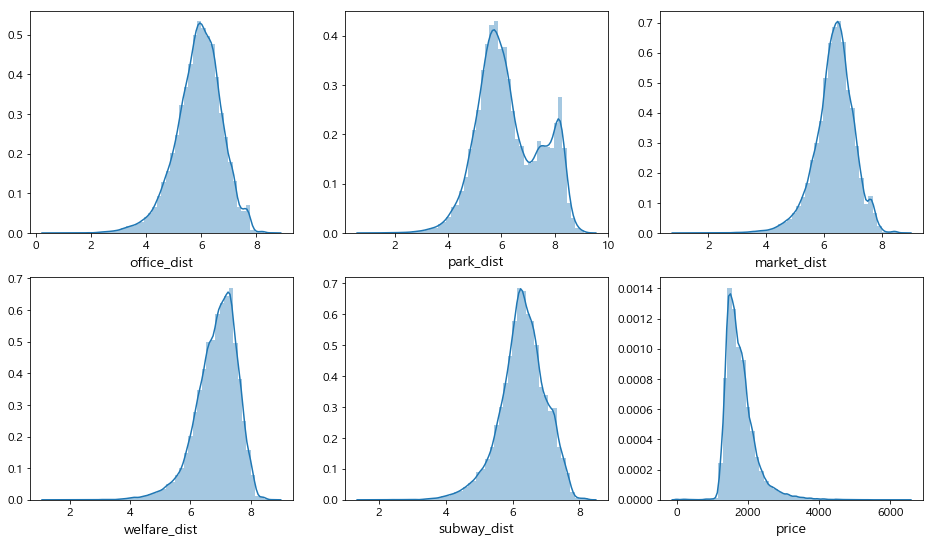

In [87]:
plt.rcParams['figure.figsize'] = 16, 9
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
sns.distplot(np.log(df1.office_dist+1),ax=ax1)
sns.distplot(np.log(df1.park_dist+1),ax=ax2)
sns.distplot(np.log(df1.market_dist+1),ax=ax3)
sns.distplot(np.log(df1.welfare_dist+1),ax=ax4)
sns.distplot(np.log(df1.subway_dist+1),ax=ax5)
sns.distplot(np.sqrt(df1.price+1),ax=ax6)

In [105]:
df1['office_log'] = np.log(df1.office_dist+1)
df1['market_log'] = np.log(df1.market_dist+1)
df1['welfare_log'] = np.log(df1.welfare_dist+1)
df1['subway_log'] = np.log(df1.subway_dist+1)
df1['price_sqrt'] = np.sqrt(df1.price+1)

C:\Users\hanbee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hanbee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hanbee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [103]:
df1.head()

,geometry,시군구코드,구주소,price,office_dist,park_dist,market_dist,welfare_dist,subway_dist,in_target,office_log,market_log,welfare_log,park_log,price_sqrt,subway_log
0,POINT (951595.8959097113 1956016.413927333),11410,서울특별시 서대문구 홍은동 8-685번지,1784000,707.505064,1023.975805,1440.152805,3036.598402,1410.207250,0.0,6.563157,7.273199,8.018822,7.252201,1335.665003,7.252201
1,POINT (954451.4392070894 1954113.482411152),11110,서울특별시 종로구 삼청동 26-7번지,4655000,910.728245,614.250302,863.505717,1047.783288,985.050193,0.0,6.815342,6.762158,6.955386,6.893707,2157.545133,6.893707
2,POINT (952942.5699143736 1953214.75949659),11110,서울특별시 종로구 누상동 166-200번지,3322000,522.486924,119.300898,476.799300,1233.081022,589.564319,0.0,6.260512,6.169191,7.118082,6.381079,1822.635729,6.381079
3,POINT (953031.1635944548 1952492.501549389),11110,서울특별시 종로구 사직동 311-2번지,3600000,356.678950,215.614685,624.231529,848.630417,551.810160,0.0,5.879636,6.438122,6.744801,6.315015,1897.366860,6.315015
4,POINT (952994.7800167626 1952483.521969236),11110,서울특별시 종로구 사직동 311-73번지,3488000,355.900983,203.068699,588.539752,811.355504,535.342653,0.0,5.877458,6.379342,6.699938,6.284773,1867.619073,6.284773


In [106]:
target = df1[df1.in_target == 1]
invalid = df1[df1.in_target != 1]

In [92]:
target.shape

(749, 15)

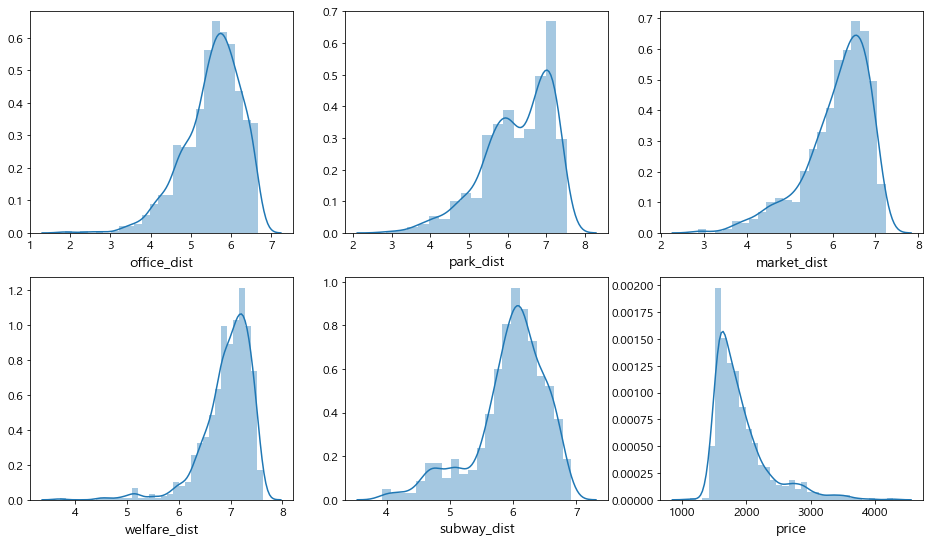

In [94]:
plt.rcParams['figure.figsize'] = 16, 9
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
sns.distplot(np.log(target.office_dist+1),ax=ax1)
sns.distplot(np.log(target.park_dist+1),ax=ax2)
sns.distplot(np.log(target.market_dist+1),ax=ax3)
sns.distplot(np.log(target.welfare_dist+1),ax=ax4)
sns.distplot(np.log(target.subway_dist+1),ax=ax5)
sns.distplot(np.sqrt(target.price+1),ax=ax6)

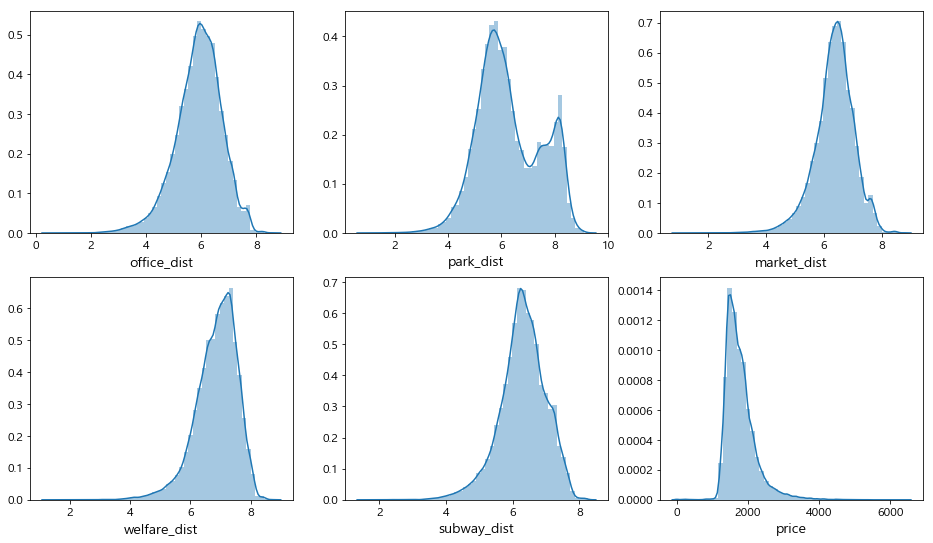

In [95]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
sns.distplot(np.log(invalid.office_dist+1),ax=ax1)
sns.distplot(np.log(invalid.park_dist+1),ax=ax2)
sns.distplot(np.log(invalid.market_dist+1),ax=ax3)
sns.distplot(np.log(invalid.welfare_dist+1),ax=ax4)
sns.distplot(np.log(invalid.subway_dist+1),ax=ax5)
sns.distplot(np.sqrt(invalid.price+1),ax=ax6)

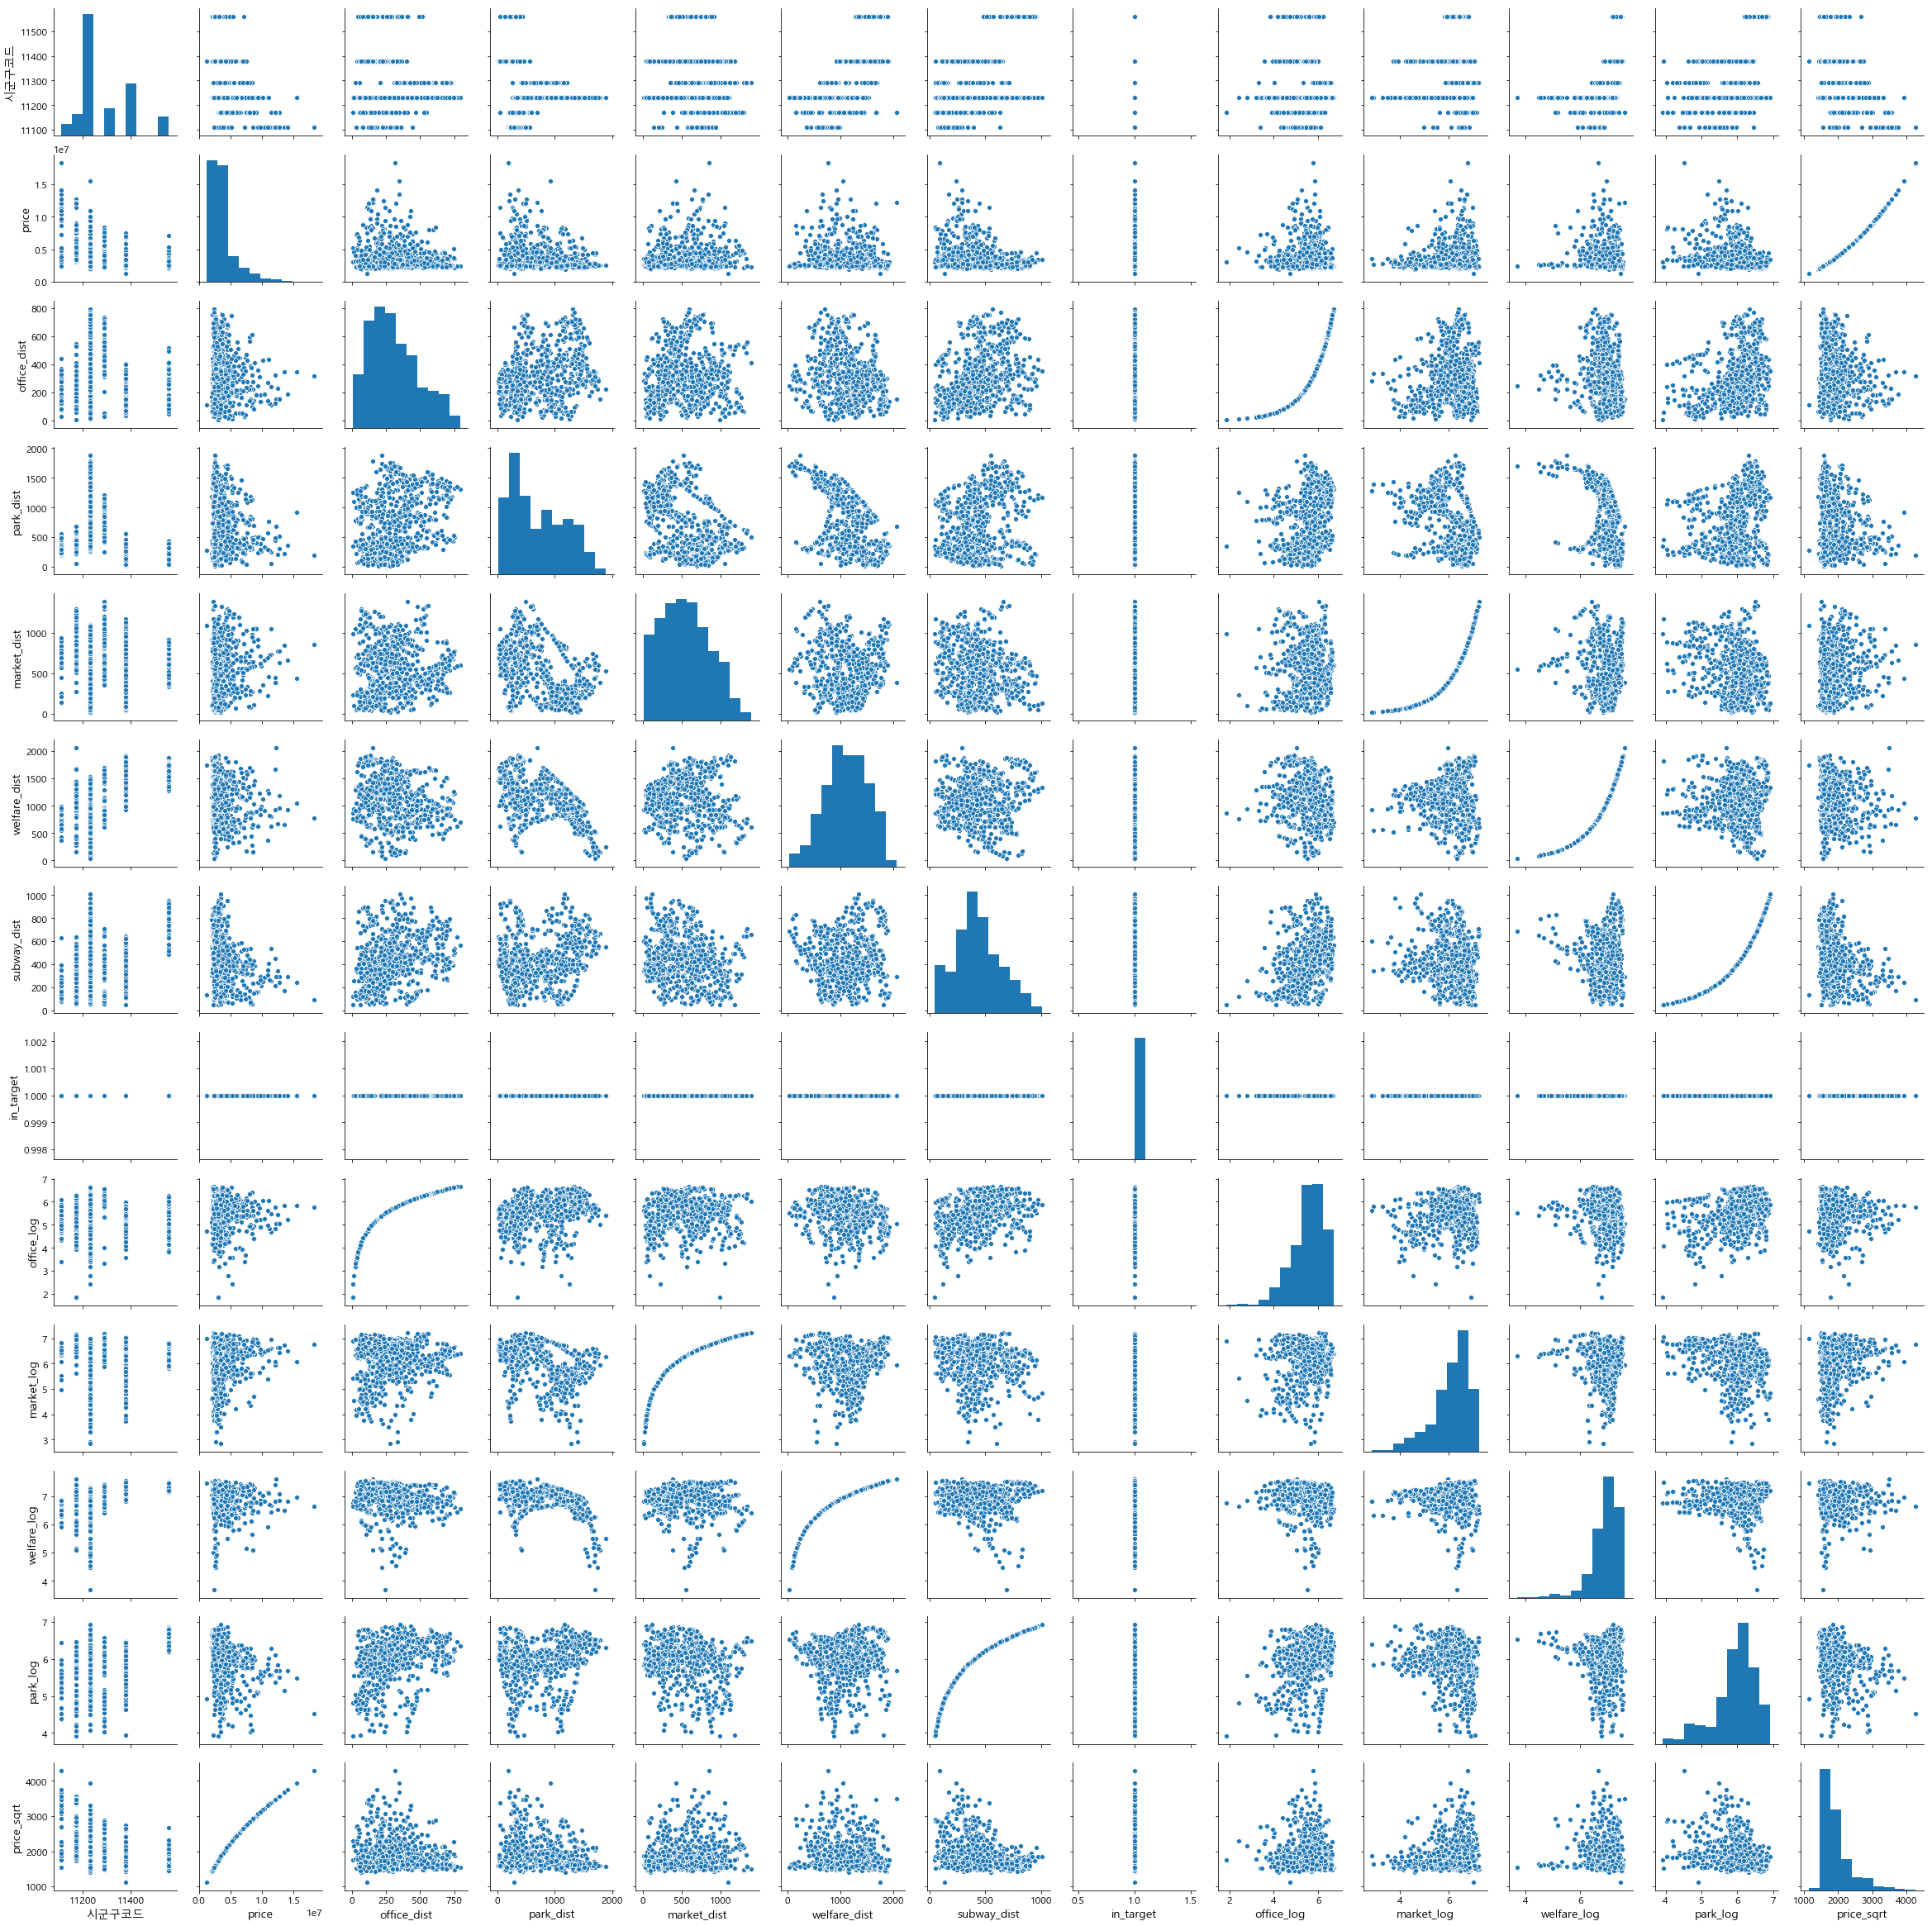

In [96]:
sns.pairplot(target)

In [107]:
sample = invalid.sample(n=749, random_state=42)

In [108]:
target = pd.concat([target, sample])

In [109]:
target.columns

Index(['geometry', '시군구코드', '구주소', 'price', 'office_dist', 'park_dist',
       'market_dist', 'welfare_dist', 'subway_dist', 'in_target', 'office_log',
       'market_log', 'welfare_log', 'subway_log', 'price_sqrt'],
      dtype='object')

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score

In [112]:
X =target[['office_log','market_log', 'welfare_log', 'subway_log', 'price_sqrt']]
y = target['in_target']

In [113]:
from sklearn.model_selection import train_test_split

train_test = dict(zip(['X_trn', 'X_tst', 'y_trn', 'y_tst'], train_test_split(X, y)))
train_test['X'] = X
train_test['y'] = y

In [114]:
def create_pipeline():
    pls = {'NaiveBayes': Pipeline([('clf', MultinomialNB())]),
           'RandomForest': Pipeline([('clf', RandomForestClassifier(n_jobs=-1))]),
           'ExtraTrees': Pipeline([('clf', ExtraTreesClassifier(n_jobs=-1))]),
           'AdaBoost': Pipeline([('clf', AdaBoostClassifier())]),
           'GradientBoost': Pipeline([('clf', GradientBoostingClassifier())])}
    ensemble = VotingClassifier(estimators=[(k, v) for k, v in pls.items()], n_jobs=-1, voting='soft')
    pls['Ensemble'] = ensemble
    return pls

In [122]:
pl = create_pipeline()
pl['ExtraTrees'].fit(train_test['X_trn'], train_test['y_trn'])
pred = pl['ExtraTrees'].predict(train_test['X_tst'])
print('test', np.mean(pred == train_test['y_tst']))

test 0.856


In [127]:
pl = create_pipeline()
pl['Ensemble'].fit(train_test['X_trn'], train_test['y_trn'])
pred = pl['Ensemble'].predict(train_test['X_tst'])
print('test', np.mean(pred == train_test['y_tst']))

test 0.8533333333333334


C:\Users\hanbee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [128]:
model = pl['ExtraTrees'].fit(train_test['X_trn'], train_test['y_trn'])

In [126]:
prediction = invalid[['office_log','market_log', 'welfare_log', 'subway_log', 'price_sqrt']]

In [129]:
pred = model.predict(prediction)

In [130]:
importances = pl['ExtraTrees'].named_steps['clf'].feature_importances_ 

In [131]:
importances

array([0.19887454, 0.19782641, 0.22018439, 0.20950081, 0.17361385])

In [132]:
estimator = model.named_steps['clf'].estimators_[5]

In [133]:
from sklearn.tree import export_graphviz
str_tree=export_graphviz(estimator,
                         out_file=None,
                         feature_names=X.columns,
                         filled=True,
                         special_characters=True,
                         rotate=True)

In [134]:
from IPython import display
display.display(str_tree)

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\nrankdir=LR ;\n0 [label=<subway_log &le; 7.02<br/>gini = 0.5<br/>samples = 1123<br/>value = [547, 576]>, fillcolor="#399de50d"] ;\n1 [label=<market_log &le; 5.489<br/>gini = 0.494<br/>samples = 1035<br/>value = [459, 576]>, fillcolor="#399de534"] ;\n0 -> 1 [labeldistance=2.5, labelangle=-45, headlabel="True"] ;\n2 [label=<welfare_log &le; 6.777<br/>gini = 0.45<br/>samples = 152<br/>value = [52, 100]>, fillcolor="#399de57a"] ;\n1 -> 2 ;\n3 [label=<welfare_log &le; 5.675<br/>gini = 0.5<br/>samples = 42<br/>value = [21, 21]>, fillcolor="#e5813900"] ;\n2 -> 3 ;\n4 [label=<gini = 0.0<br/>samples = 6<br/>value = [6, 0]>, fillcolor="#e58139ff"] ;\n3 -> 4 ;\n5 [label=<subway_log &le; 5.466<br/>gini = 0.486<br/>samples = 36<br/>value = [15, 21]>, fillcolor="#399de549"] ;\n3 -> 5 ;\n6 [label=<gini = 0.0<br/>samples = 5<br/>value = [0, 5]>, fillcolor="#399de5ff"] ;\n5 -> 6 ;\n7 [label=<subway_log &le; 5.698<br/>gini = 0.499<br/>sa

In [135]:
invalid['pred']=pred

C:\Users\hanbee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [136]:
prediction.shape

(39726, 5)

In [137]:
invalid.pred.value_counts()

0.0    32461
1.0     7265
Name: pred, dtype: int64

In [138]:
invalid.to_excel('C:\\Users\\hanbee\\Dropbox\\국토부 해커톤\\data\\notebook\\pred_final_sw.xlsx')

In [33]:
invalid.tail()

,geometry,시군구코드,구주소,office_dist,park_dist,market_dist,welfare_dist,public_hospital_dist,in_target,office_log,market_log,welfare_log,hospital_log,park_log,pred
40470,POINT (960889.2219522819 1953931.81566951),11230,서울특별시 동대문구 전농동 113-24번지,570.470661,1776.471767,660.944691,733.346566,1859.324006,0,6.348213,6.495182,6.598981,7.528506,7.482947,0
40471,POINT (959025.0157691579 1961060.181030676),11320,서울특별시 도봉구 쌍문동 143-49번지,125.776903,466.879165,1053.175028,1034.187007,1130.446116,0,4.842429,6.960514,6.942337,7.031252,6.148210,1
40472,POINT (955441.6801190402 1947936.566590376),11170,서울특별시 용산구 이태원동 96-11번지,234.809556,858.384031,486.784832,969.874877,583.624630,0,5.463025,6.189874,6.878198,6.370970,6.756216,1
40473,POINT (955289.3026873026 1947921.646019504),11170,서울특별시 용산구 이태원동 63-40번지,111.986978,788.637714,589.378377,1122.475973,472.863995,0,4.727273,6.380764,7.024183,6.160920,6.671574,1
40474,POINT (947351.0112899299 1939334.614791039),11545,서울특별시 금천구 시흥동 879-101번지,208.368536,165.278931,667.433020,643.323897,976.473742,0,5.344096,6.504936,6.468202,6.884971,5.113667,0


In [45]:
pd.concat([invalid,df1['price']],axis=1).dropna().to_excel('C:\\Users\\hanbee\\Dropbox\\국토부 해커톤\\data\\notebook\\pred_final.xlsx')

In [44]:
invalid.shape

(39726, 15)